# VSM模型的建立与求解

## 1.1 VSM模型概述

VSM(Vector Space Model)模型，向量空间模型由Salton等人于20世纪70年代提出，并成功地应用于著名的SMART文本检索系统。把对文本内容的处理简化为向量空间中的向量运算，并且它以空间上的相似度表达语义的相似度，直观易懂。

VSM概念简单，把对文本内容的处理简化为向量空间中的向量运算，并且它以空间上的相似度表达语义的相似度，直观易懂。当文档被表示为文档空间的向量，就可以通过计算向量之间的相似性来度量文档间的相似性。文本处理中最常用的相似性度量方式是余弦距离。

文件（语料）被视为索引词（关键词）形成的多次元向量空间， 索引词的集合通常为文件中至少出现过一次的词组。搜寻时，输入的检索词也被转换成类似于文件的向量，这个模型假设，文件和搜寻词的相关程度，可以经由比较每个文件(向量）和检索词（向量）的夹角偏差程度而得知。

实际上，计算夹角向量之间的余弦比直接计算夹角容易：余弦为零表示检索词向量垂直于文件向量，即没有符合，也就是说该文件不含此检索词。通过上述的向量空间模型，文本数据就转换成了计算机可以处理的结构化数据，两个文档之间的相似性问题转变成了两个向量之间的相似性问题。

先假设有两份文档，我们对其做如下处理：

1. 将两篇文档进行分词；
2. 将分词的结果做成语料库，并去重形成一个不重复、不遗漏的字典，并假设这个字典的个数为$N$，这个字典即多次元的向量空间；
3. 形成两个$N$维全零向量$\vec{V}_1$与$\vec{V}_2$，用于统计存放两篇文档的词频，形成文本空间向量；
4. 遍历文档1，当遇到某一个词语$x$，寻找其在字典中对应的序号$i$，并在$\vec{V}_1$的$i$号位置上+1，并对文档2做同样的操作；
5. 将得到的$\vec{V}_1$与$\vec{V}_2$求其在当前字典（向量文本空间）中指向的方向余弦：$\cos <\vec{V}_1 , \vec{V}_2> = \frac{\vec{V}_1 \cdot \vec{V}_2}{|\vec{V}_1|\cdot|\vec{V}_2|}$，即可得到两个文本的相似度。

## 1.2 VSM模型在小说文本相似度比较方面的应用

以《三体》和《复活》，与《三体》和《战争与和平》两个相似度为例子，进行以下python程序的操作。

### 1.2.1 导入相关库(这方面需要经验积累)

- numpy 科学计算库
- matplotlib 绘图可视化库
- jieba 中文分词库
- wordcloud 词云制作库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jieba as jb
import wordcloud as wcd

### 1.2.2 读写文本进行分词

1. 去网上查询三篇小说的文档txt（查阅资料）
2. 用python读入程序
3. 使用jieba库的lcut()函数，将字符串分词为列表返回

In [2]:
'''读入文本'''

filename = ["threebody.txt","rebirth.txt","warandpeace.txt"]
for file in filename:
    with open(file , "r" , encoding="utf-8") as f:
        if file == "threebody.txt":
            txt0 = f.read()
            pass
        elif file == "rebirth.txt":
            txt1 = f.read()
            pass
        else:
            txt2 = f.read()
            pass
        pass
    f.close()
    pass

'''做成列表'''

ls0 = jb.lcut(txt0)
ls1 = jb.lcut(txt1)
ls2 = jb.lcut(txt2)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.826 seconds.
Prefix dict has been built successfully.


### 1.2.3 词云制作

使用wordcloud词云库进行词云图片的制作，以获得一个直观感性的认识。

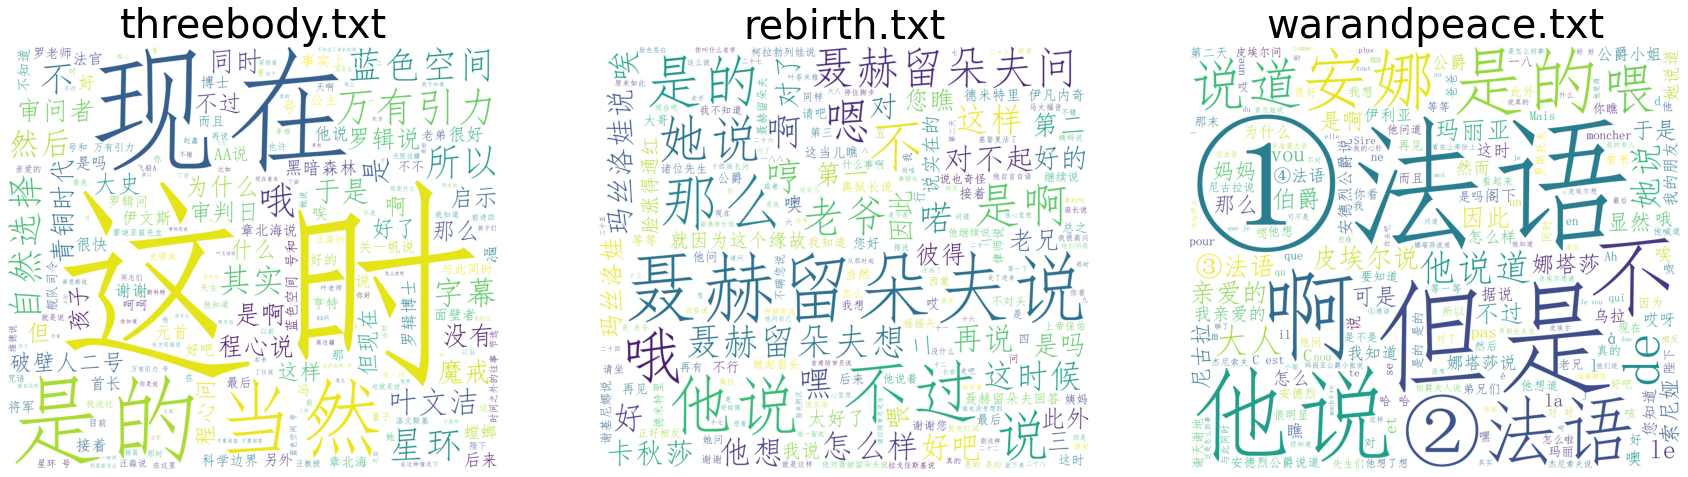

In [3]:
'''词云制图'''

pic0 = wcd.WordCloud(  
        background_color = 'white', #背景颜色，根据图片背景设置，默认为黑色  
        #mask = backgroup_Image, #笼罩图  
        font_path = r'SIMFANG.TTF',#若有中文需要设置才会显示中文 
        width = 1000,  
        height = 860,  
        margin = 2).generate(txt0) # generate 可以对全部文本进行自动分词  
pic1 = wcd.WordCloud(  
        background_color = 'white', #背景颜色，根据图片背景设置，默认为黑色  
        #mask = backgroup_Image, #笼罩图  
        font_path = r'SIMFANG.TTF',#若有中文需要设置才会显示中文 
        width = 1000,  
        height = 860,  
        margin = 2).generate(txt1) # generate 可以对全部文本进行自动分词 
pic2 = wcd.WordCloud(  
        background_color = 'white', #背景颜色，根据图片背景设置，默认为黑色  
        #mask = backgroup_Image, #笼罩图  
        font_path = r'SIMFANG.TTF',#若有中文需要设置才会显示中文 
        width = 1000,  
        height = 860,  
        margin = 2).generate(txt2) # generate 可以对全部文本进行自动分词 

'''绘制词云，可视化'''

plt.figure(figsize = (30 , 8))
for i in range(3):
    plt.subplot(1 , 3 , i+1)
    plt.imshow(eval('pic'+str(i)))
    plt.axis('off')
    plt.title(filename[i] , fontsize = 40)
    pass
plt.show()

### 1.2.4 文本空间制作

1. 先利用python中list相加的功能，将三篇文档的所有词语全部汇总起来；
2. 再利用python程序中的set功能，将list类型里的重复元素去掉；
3. 形成ls这个向量文本空间；

```python
ls = ls0 + ls1 + ls2...
ls = set(ls) #去重
ls = list(ls) #转回list列表类型
```

In [4]:
ls = ls0 + ls1 +ls2
ls = list(set(ls)) #去重
N = len(ls)
print("共有字词个数：",N)

共有字词个数： 57896


### 1.2.5 文本向量张成

定义三个空向量，然后遍历ls，对于ls中的某个item，数其在ls0,ls1,ls2中的个数，填入空向量对应位置的数字上。

需要注意的是这一步有多种算法实现，但是计算代价都特别大，需要仔细思考，找到合适的算法。

In [5]:
a0 = np.zeros(N)
a1 = np.zeros(N)
a2 = np.zeros(N)

for i in range(N):
    item = ls[i]
    a0[i] = ls0.count(item)
    a1[i] = ls1.count(item)
    a2[i] = ls2.count(item)
    pass

### 1.2.6 基于VSM模型的文本相似度计算比较

如前所述，假设三体对应的向量文本是$\vec{a}_0$，复活对应$\vec{a}_1$，战争与和平对应$\vec{a}_2$，那么我们定义相似度：

$$
s_{ij} = s_{ji} = \cos<\vec{a}_i , \vec{a}_j> = \frac{\vec{a}_1 \cdot \vec{a}_2}{|\vec{a}_1|\cdot|\vec{a}_2|}=\text{文本}i\text{与文本}j\text{的文本空间相似度}
$$

遂定义如下的计算函数用于计算

In [6]:
def cosine(vec1 , vec2):
    value1 = vec1.dot(vec2)
    value2 = np.sqrt(vec1.dot(vec1) * vec2.dot(vec2))
    v = value1 / value2
    return v 
    pass

s01 = cosine(a0 , a1)
s02 = cosine(a0 , a2)

print("《三体》与《复活》的向量空间文本相似度为：",s01)
print("《三体》与《战争与和平》的向量空间文本相似度为：",s02)

《三体》与《复活》的向量空间文本相似度为： 0.30941952568906894
《三体》与《战争与和平》的向量空间文本相似度为： 0.8278333176703525


所以可以得出结论：按照VSM模型，《三体》和《复活》的文本相似程度，是低于《三体》与《战争与和平》的文本相似程度的。